<a href="https://colab.research.google.com/github/ygxrb/analises-vendas/blob/main/an%C3%A1lise_im%C3%B3veis_SPxRJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação de bibliotecas


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("pastel")

#Carregamento de dados

In [ ]:
df_imoveis = pd.read_csv('imoveis.csv')
df_transacoes = pd.read_csv('transacoes.csv')

#Visualizando as primeiras linhas


In [ ]:

display(df_imoveis.head())

display(df_transacoes.head())


,id_imovel,tipo,cidade,bairro,area_m2,quartos,banheiros,vaga_garagem,preco
0,ad0f297f-96ee-459e-979c-b1d98d288af3,Apartamento,São Paulo,Vila Mariana,44,3,1,0,312000.0
1,67810c18-5855-4c88-b50c-3c99b8bead7a,Apartamento,Rio de Janeiro,Tijuca,61,3,1,1,405000.0
2,f771d64d-c9b7-4163-bd37-3f178742e81c,Casa,Rio de Janeiro,Tijuca,30,4,1,0,300000.0
3,5c075375-0de8-40a2-9dc9-262c2bec279e,Casa,Rio de Janeiro,Botafogo,55,2,1,0,794000.0
4,1af03c87-2261-4a3e-9b70-88948b95ad68,Kitnet,São Paulo,Moema,85,4,3,0,579000.0


,id_transacao,id_imovel,data_anuncio,data_venda,preco_venda
0,829516bb-c3cb-44e6-a0b3-6b844dca9678,42fff7d1-63fd-40c0-819c-e1ba2b4a6187,2023-12-06 20:57:24.656579,2024-05-21 20:57:24.656579,914000.0
1,8f6a3885-ca5f-40ce-91f9-9cb3dde9491d,6b956768-99df-4908-8d34-d883ee7d60b7,2024-10-15 20:57:24.657360,2025-02-15 20:57:24.657360,563000.0
2,83a144a7-83c7-479e-9597-368c071e4f1d,14cd6977-22fa-410a-9b36-841b448de6d3,2024-08-05 20:57:24.658087,2024-10-24 20:57:24.658087,695000.0
3,2c6d9bc1-bee3-4236-8277-1a918f11d973,a1a29e5a-9cbb-4d8a-a4b3-816c51fd2ca9,2024-05-29 20:57:24.658672,2024-07-27 20:57:24.658672,575000.0
4,8496d813-943f-4ea9-bbb7-3c92cb66692b,975ce73f-2898-4385-8130-0df5ba7a9ab9,2024-09-06 20:57:24.659272,2025-02-08 20:57:24.659272,644000.0


#Tratamento de dados

In [ ]:
#garantindo que as colunas de datas sejam interpretadas como datas

df_transacoes['data_anuncio'] = pd.to_datetime(df_transacoes['data_anuncio'])
df_transacoes['data_venda'] = pd.to_datetime(df_transacoes['data_venda'])

#criando coluna de dias para vendar
df_transacoes['dias_para_venda'] = (df_transacoes['data_venda'] - df_transacoes['data_anuncio']).dt.days

#visualizando o resultado
df_transacoes.head()

,id_transacao,id_imovel,data_anuncio,data_venda,preco_venda,dias_para_venda
0,829516bb-c3cb-44e6-a0b3-6b844dca9678,42fff7d1-63fd-40c0-819c-e1ba2b4a6187,2023-12-06 20:57:24.656579,2024-05-21 20:57:24.656579,914000.0,167
1,8f6a3885-ca5f-40ce-91f9-9cb3dde9491d,6b956768-99df-4908-8d34-d883ee7d60b7,2024-10-15 20:57:24.657360,2025-02-15 20:57:24.657360,563000.0,123
2,83a144a7-83c7-479e-9597-368c071e4f1d,14cd6977-22fa-410a-9b36-841b448de6d3,2024-08-05 20:57:24.658087,2024-10-24 20:57:24.658087,695000.0,80
3,2c6d9bc1-bee3-4236-8277-1a918f11d973,a1a29e5a-9cbb-4d8a-a4b3-816c51fd2ca9,2024-05-29 20:57:24.658672,2024-07-27 20:57:24.658672,575000.0,59
4,8496d813-943f-4ea9-bbb7-3c92cb66692b,975ce73f-2898-4385-8130-0df5ba7a9ab9,2024-09-06 20:57:24.659272,2025-02-08 20:57:24.659272,644000.0,155


#Juntando os datasets


In [ ]:
#usando 'id_imovel' como chave e left join para manter as transações
df_merged = pd.merge(df_transacoes, df_imoveis, on='id_imovel', how='left')

#Problema 1: QUAL O TEMPO MÉDIO DE VENDA POR CIDADE?

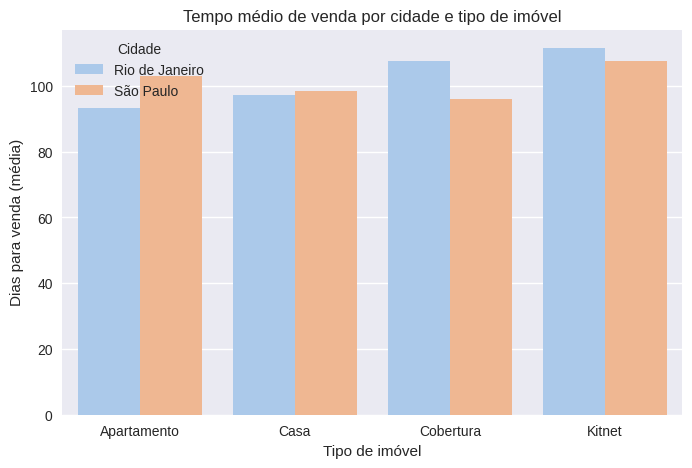

In [ ]:
df_tempo_venda = df_merged.groupby(['cidade','tipo'])['dias_para_venda'].mean().reset_index()

df_tempo_venda

# Gráfico: tempo médio de venda
plt.figure(figsize=(8,5))
sns.barplot(data=df_tempo_venda, x="tipo", y="dias_para_venda", hue="cidade")
plt.title("Tempo médio de venda por cidade e tipo de imóvel")
plt.ylabel("Dias para venda (média)")
plt.xlabel("Tipo de imóvel")
plt.legend(title="Cidade")
plt.show()

#Problema 2: QUAL A MÉDIA DE VALORIZAÇÃO POR BAIRRO?


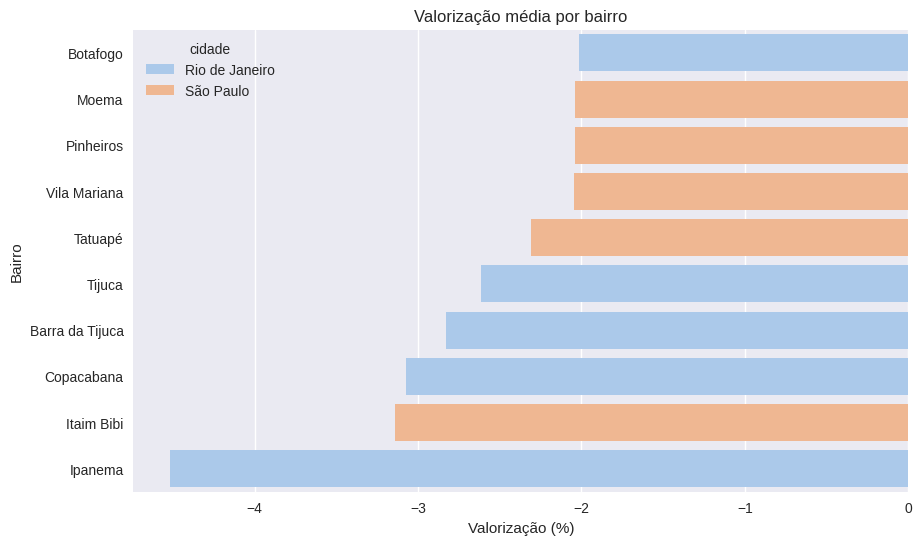

In [ ]:
#criando a coluna 'valorização_percentual'
df_merged['valorizacao_percentual'] = ((df_merged['preco_venda'] - df_merged['preco']) / df_merged['preco']) * 100


df_valorizacao = df_merged.groupby(['cidade','bairro'])['valorizacao_percentual'].mean().reset_index()

df_valorizacao


plt.figure(figsize=(10,6))
sns.barplot(
    data=df_valorizacao.sort_values('valorizacao_percentual', ascending=False),
    x="valorizacao_percentual",
    y="bairro",
    hue="cidade"
)
plt.title("Valorização média por bairro")
plt.xlabel("Valorização (%)")
plt.ylabel("Bairro")
plt.show()


#Problema 3: QUAL O VALOR DOS IMÓVEIS POR METRO QUADRADO?

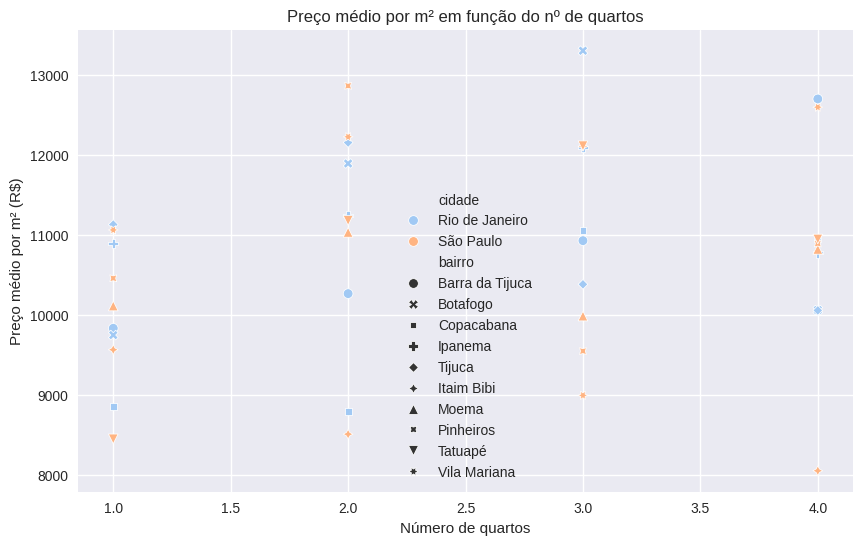

In [ ]:
df_merged['preco_m2'] = df_merged['preco'] / df_merged['area_m2']
df_custo_m2 = df_merged.groupby(['cidade','bairro','quartos'])[['area_m2','preco_m2',]].mean().reset_index().head(50)
df_custo_m2


plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_custo_m2,
    x="quartos",
    y="preco_m2",
    hue="cidade",
    style="bairro"
)
plt.title("Preço médio por m² em função do nº de quartos")
plt.xlabel("Número de quartos")
plt.ylabel("Preço médio por m² (R$)")
plt.show()




#INSIGHTS:

1 Em média, [tipo] em SP vendem X dias mais rápido que no RJ.

2 Bairros como X e Y apresentam maior valorização média.

3 Custo por m² aumenta com número de quartos em certas regiões.
